In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

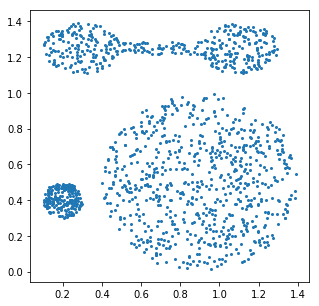

In [4]:
df = pd.read_csv('cluster2.csv')
X = df.values
plt.figure(figsize = (5,5))
plt.scatter(X[:,0],X[:,1],s=4)
plt.show()

In [ ]:
print('dimensions of the data = {}'.format(df.shape))

In [7]:
k_means = KMeans(n_clusters=4, random_state=0)

In [8]:
y_pred = k_means.fit_predict(X)
print(y_pred[:10])

[0 0 3 3 0 3 3 0 3 0]


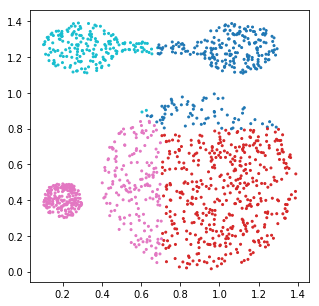

In [9]:
plt.figure(figsize = (5,5))
plt.scatter(X[:,0],X[:,1], c=y_pred,s=4, cmap='tab10')
plt.show()

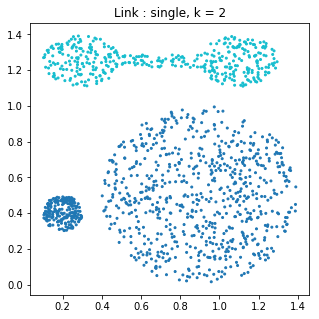

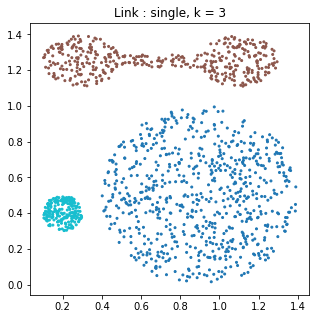

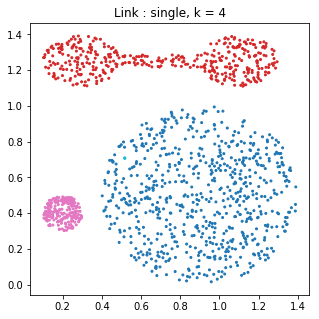

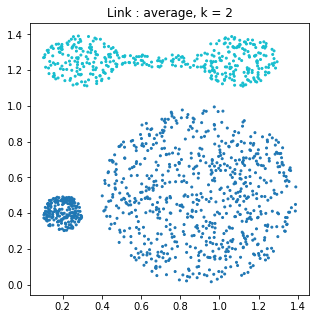

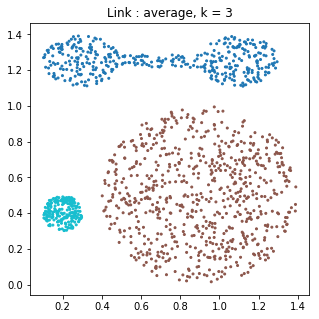

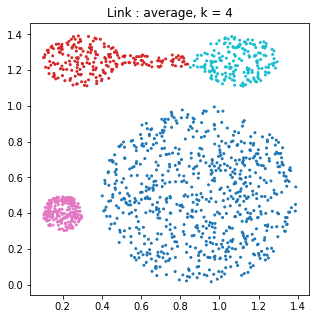

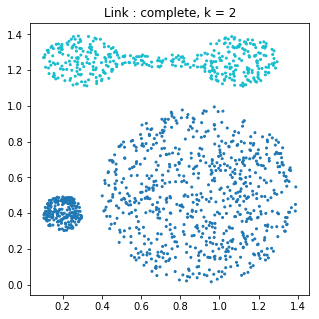

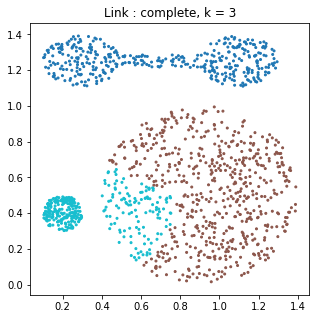

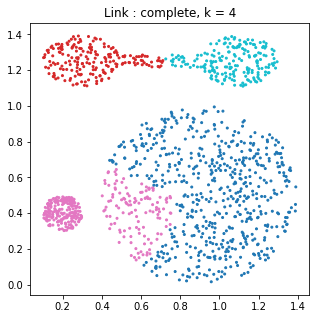

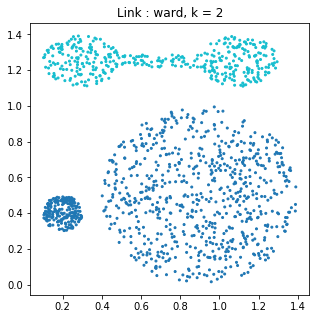

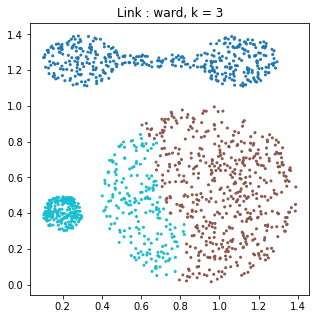

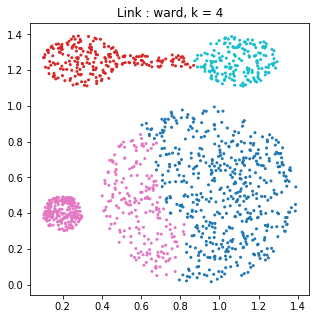

In [12]:
from sklearn.cluster import AgglomerativeClustering
for i, link in enumerate(('single','average', 'complete', 'ward')):
    for j, k in enumerate((2,3,4)):
        clustering = AgglomerativeClustering(linkage=link, n_clusters=k, affinity='euclidean')
        y_pred = clustering.fit_predict(X)
        plt.figure(i*3+j,figsize=(5,5))
        plt.scatter(X[:,0],X[:,1], c=y_pred, s=4, cmap='tab10')
        plt.title('Link : {}, k = {}'.format(link,k))
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

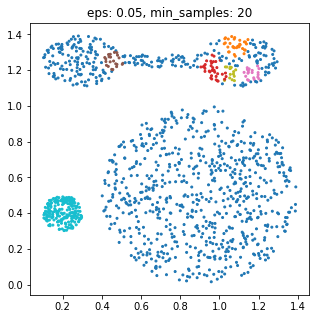

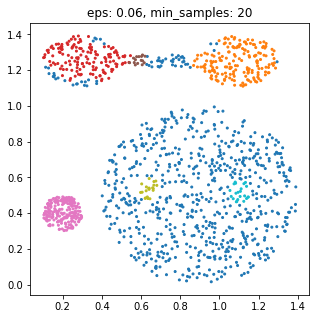

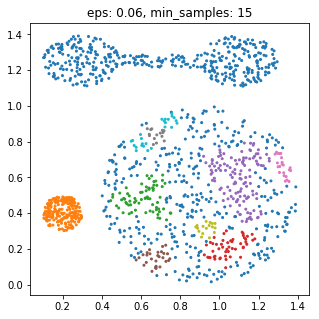

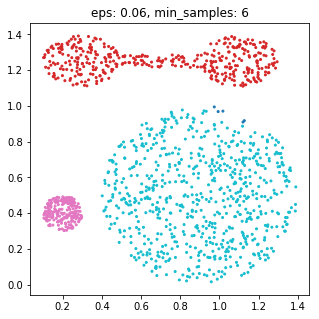

In [16]:
for i, (eps, min_samples) in enumerate(((0.05, 20), (0.06, 20), (0.06, 15), (0.06, 6))):
    dbscan = DBSCAN(eps=eps, min_samples = min_samples)
    y_pred = dbscan.fit_predict(X)
    plt.figure(i+1, figsize=(5,5))
    plt.scatter(X[:,0], X[:,1],cmap='tab10',s=4,c=y_pred)
    plt.title('eps: {}, min_samples: {}'.format(eps, min_samples))
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=4, max_iter=20, random_state=0)
y_pred = em.fit_predict(X)

In [18]:
print(em.weights_)

[0.54305501 0.15217282 0.15989176 0.14488041]


In [19]:
print(em.means_)

[[0.90092247 0.49695211]
 [0.20256314 0.40738658]
 [0.37381659 1.25479151]
 [1.07851102 1.24600705]]


In [20]:
print(em.covariances_)

[[[ 6.49289207e-02 -4.78095962e-04]
  [-4.78095962e-04  6.03293794e-02]]

 [[ 2.73531910e-03 -7.02052996e-05]
  [-7.02052996e-05  2.51901315e-03]]

 [[ 3.12803346e-02 -5.83851370e-04]
  [-5.83851370e-04  4.11677639e-03]]

 [[ 1.44971509e-02  4.61343042e-04]
  [ 4.61343042e-04  5.12229085e-03]]]


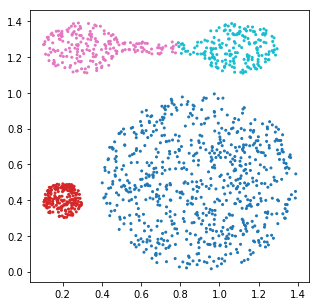

In [21]:
plt.figure(figsize = (5,5))
plt.scatter(X[:,0],X[:,1], c=y_pred,s=4, cmap='tab10')
plt.show()